In [1]:
from __future__ import print_function

from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='talk')

figure_folder = 'figures'
! mkdir $figure_folder

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

study = flotilla.embark('singlecell_pnm_miso_modalities', flotilla_dir=flotilla_dir)

mkdir: cannot create directory `figures': File exists
2016-07-15 13:33:14	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_miso_modalities/datapackage.json
2016-07-15 13:33:14	Parsing datapackage to create a Study object
2016-07-15 13:34:13 	Initializing Study
2016-07-15 13:34:13 	Initializing Predictor configuration manager for Study
2016-07-15 13:34:13	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-07-15 13:34:13	Added ExtraTreesClassifier to default predictors
2016-07-15 13:34:13	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-07-15 13:34:13	Added ExtraTreesRegressor to default predictors
2016-07-15 13:34:13	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-07-15 13:34:13	Added GradientBoostingClassifier to default predictors
2016-07-15 13:34:13	Predictor GradientB

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


In [2]:
folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
csv_folder = '{}/csvs_for_paper/'.format(folder)
bed_folder = '{}/bed'.format(folder)



splicing_feature_folder = '{}/splicing_feature_data'.format(csv_folder)
alternative_feature_folder = '{}/alternative'.format(splicing_feature_folder)
constitutive_feature_folder = '{}/constitutive'.format(splicing_feature_folder)

In [3]:
for x in sorted(study.splicing.feature_data.columns):
    print(x)

biomark_neural_panel
confident_rbp
ensembl_gene
ensembl_transcript
exon1_5p_splice_site_phastcons_100way
exon1_5p_splice_site_seq
exon1_5p_splice_site_strength
exon1_clip_bound_database_ids
exon1_clip_bound_gene_ids
exon1_exon2_splice_signals
exon1_exon3_splice_signals
exon1_phastcons_100way
exon2_3p_splice_site_phastcons_100way
exon2_3p_splice_site_seq
exon2_3p_splice_site_strength
exon2_5p_splice_site_phastcons_100way
exon2_5p_splice_site_seq
exon2_5p_splice_site_strength
exon2_clip_bound_database_ids
exon2_clip_bound_gene_ids
exon2_exon3_splice_signals
exon2_frame0_pfam_domain_accession
exon2_frame0_pfam_domain_name
exon2_frame0_stop_codon
exon2_frame0_translation
exon2_frame1_pfam_domain_accession
exon2_frame1_pfam_domain_name
exon2_frame1_stop_codon
exon2_frame1_translation
exon2_frame2_pfam_domain_accession
exon2_frame2_pfam_domain_name
exon2_frame2_stop_codon
exon2_frame2_translation
exon2_gc
exon2_gc_codon_position1
exon2_gc_codon_position2
exon2_gc_codon_position3
exon2_length

In [6]:
study.splicing.feature_data['ensembl_gene'].head()

chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-    ENSG00000119943
chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-    ENSG00000107521
chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-    ENSG00000107521
chr10:100193697:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-    ENSG00000107521
chr10:100193740:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-    ENSG00000107521
Name: ensembl_gene, dtype: object

In [9]:
spliced_genes = study.splicing.feature_data['ensembl_gene'].to_frame()
spliced_genes.head()

,ensembl_gene
chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-,ENSG00000119943
chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,ENSG00000107521
chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,ENSG00000107521
chr10:100193697:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,ENSG00000107521
chr10:100193740:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,ENSG00000107521


In [13]:
event_phylostrata = spliced_genes.join(study.expression.feature_data['domazetloso2008_phylostratum'], on='ensembl_gene')
event_phylostrata.head()

,ensembl_gene,domazetloso2008_phylostratum
chr10:100150355:100150511:-@chr10:100148111:100148265:-@chr10:100146958:100147064:-,ENSG00000119943,1
chr10:100186972:100187021:-@chr10:100185575:100185742:-@chr10:100185298:100185477:-,ENSG00000107521,2
chr10:100190328:100190427:-@chr10:100189548:100189646:-@chr10:100189330:100189399:-,ENSG00000107521,2
chr10:100193697:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,ENSG00000107521,2
chr10:100193740:100193848:-@chr10:100190888:100191048:-@chr10:100190328:100190427:-,ENSG00000107521,2


In [14]:
modality_phylostrata = study.supplemental.modalities_tidy.join(event_phylostrata, on='event_id')
modality_phylostrata.head()

,event_id,phenotype,modality,ensembl_gene,domazetloso2008_phylostratum
2,chr10:100190328:100190427:-@chr10:100189548:10...,iPSC,bimodal,ENSG00000107521,2
5,chr10:100193697:100193848:-@chr10:100190888:10...,iPSC,uncategorized,ENSG00000107521,2
8,chr10:100193740:100193848:-@chr10:100190888:10...,iPSC,uncategorized,ENSG00000107521,2
11,chr10:100195392:100195529:-@chr10:100195029:10...,iPSC,uncategorized,ENSG00000107521,2
13,chr10:101507014:101507147:+@chr10:101510126:10...,NPC,uncategorized,ENSG00000119929,1


In [16]:
import anchor
modality_to_color = anchor.MODALITY_TO_COLOR.copy()
modality_to_color['constitutive'] = '#262626'
modality_order = ['excluded', 'bimodal', 'included', 'constitutive']
modality_palette = [modality_to_color[m] for m in modality_order]

In [17]:
sns.set(context='paper', style='white')

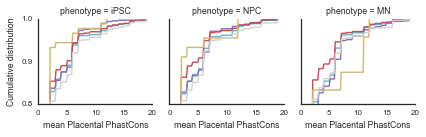

In [40]:
from flotilla.visualize.generic import cdfplot

g = sns.FacetGrid(col='phenotype', hue='modality', size=2, #aspect=.75,
            data=modality_phylostrata, hue_order=anchor.MODALITY_ORDER, palette=anchor.MODALITY_PALETTE, 
            col_order=study.phenotype_order)

g.map(cdfplot, 'domazetloso2008_phylostratum')
g.set_xlabels('mean Placental PhastCons')
g.set_ylabels('Cumulative distribution')
g.set(ylim=(0.8, 1), yticks=(0.8, 0.9, 1))
g.fig.tight_layout()
g.savefig('{}/phylostrata_cdf.pdf'.format(folder))

In [27]:
constitutive_genes = pd.read_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/csvs_for_paper/splicing_feature_data/constitutive/genes_expanded.csv', 
                                 header=None, index_col=0)
constitutive_genes.head()

,1
0,
exon:chr10:102039881-102039985:-,ENSG00000196072
exon:chr10:102040691-102040810:-,ENSG00000196072
exon:chr10:102045854-102045970:-,ENSG00000196072
exon:chr10:102045854-102046089:-,ENSG00000196072
exon:chr10:102286732-102286831:-,ENSG00000075826


In [30]:
constitutive_phylostrata = constitutive_genes.join(study.expression.feature_data['domazetloso2008_phylostratum'], on=1)
constitutive_phylostrata = constitutive_phylostrata.rename(columns={1:'ensembl_gene'})
constitutive_phylostrata.head()

,ensembl_gene,domazetloso2008_phylostratum
0,,
exon:chr10:102039881-102039985:-,ENSG00000196072,2
exon:chr10:102040691-102040810:-,ENSG00000196072,2
exon:chr10:102045854-102045970:-,ENSG00000196072,2
exon:chr10:102045854-102046089:-,ENSG00000196072,2
exon:chr10:102286732-102286831:-,ENSG00000075826,1


In [34]:
constitutive_phylostrata_tidy = constitutive_phylostrata.reset_index()
constitutive_phylostrata_tidy = constitutive_phylostrata_tidy.rename(columns={0: 'event_id'})
constitutive_phylostrata_tidy['modality'] = 'constitutive'
constitutive_phylostrata_tidy.head()

,event_id,ensembl_gene,domazetloso2008_phylostratum,modality
0,exon:chr10:102039881-102039985:-,ENSG00000196072,2,constitutive
1,exon:chr10:102040691-102040810:-,ENSG00000196072,2,constitutive
2,exon:chr10:102045854-102045970:-,ENSG00000196072,2,constitutive
3,exon:chr10:102045854-102046089:-,ENSG00000196072,2,constitutive
4,exon:chr10:102286732-102286831:-,ENSG00000075826,1,constitutive


In [35]:
modality_phylostrata_constitutive = modality_phylostrata.copy()

for phenotype in study.phenotype_order:
    tidy = constitutive_phylostrata_tidy.copy()
    tidy['phenotype'] = phenotype
    
    modality_phylostrata_constitutive = modality_phylostrata_constitutive.append(tidy)
modality_phylostrata_constitutive.tail()

,domazetloso2008_phylostratum,ensembl_gene,event_id,modality,phenotype
6461,2,ENSG00000131171,exon:chrX:80532483-80532668:+,constitutive,MN
6462,2,ENSG00000131171,exon:chrX:80533830-80533910:+,constitutive,MN
6463,2,ENSG00000000003,exon:chrX:99887482-99887565:-,constitutive,MN
6464,2,ENSG00000000003,exon:chrX:99890175-99890249:-,constitutive,MN
6465,2,ENSG00000000003,exon:chrX:99890555-99890743:-,constitutive,MN


In [43]:
hue_order = anchor.MODALITY_ORDER + ['constitutive']
palette = anchor.MODALITY_PALETTE + ['black']

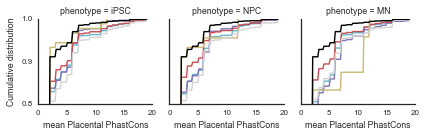

In [44]:
g = sns.FacetGrid(col='phenotype', hue='modality', size=2, #aspect=.75,
            data=modality_phylostrata_constitutive, hue_order=hue_order, palette=palette, 
            col_order=study.phenotype_order)

g.map(cdfplot, 'domazetloso2008_phylostratum')
g.set_xlabels('mean Placental PhastCons')
g.set_ylabels('Cumulative distribution')
g.set(ylim=(0.8, 1), yticks=(0.8, 0.9, 1))
g.fig.tight_layout()
g.savefig('{}/phylostrata_cdf_constitutive.pdf'.format(folder))